### Machine Learning Project




In [1]:
# Import of global libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
# Drive mounting in Google Colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Data examination

In [3]:
# We define the path to the dataset
dataset_path = '/content/gdrive/My Drive/Machine_learning_project/x_train.csv'

dataset = pd.read_csv(dataset_path)

print('Dataset length :')
print(dataset.shape)
print('Dataset feature names :')
print(dataset.columns)
print('Whole dataset :')
print(dataset)

Dataset length :
(15360, 12)
Dataset feature names :
Index(['Unnamed: 0', 'cfo_demod', 'gain_imb', 'iq_imb', 'or_off', 'quadr_err',
       'm_power', 'ph_err', 'mag_err', 'evm', 'Tosc', 'Tmix'],
      dtype='object')
Whole dataset :
       Unnamed: 0   cfo_demod  gain_imb     iq_imb     or_off  quadr_err  \
0               0  592.234802  0.048079 -35.082729 -28.560846   1.993170   
1               1 -103.302032 -0.019917 -29.946953 -35.798664  -3.642311   
2               2 -582.331299  0.036379 -32.096672 -31.905628   2.835839   
3               3 -630.611267  0.063928 -38.216297 -30.084171   1.346316   
4               4 -415.526978 -0.055761 -29.180740 -36.601025  -3.963526   
...           ...         ...       ...        ...        ...        ...   
15355       15355 -476.575653  0.039874 -39.792461 -29.962997   1.143736   
15356       15356 -345.645508  0.077925 -32.963398 -27.998444   2.524010   
15357       15357 -613.989807  0.090771 -38.951530 -28.111988   1.145893   
15358  

Data preprocessing

In [4]:
# We import data from the different CSV
x_test_original = pd.read_csv('/content/gdrive/My Drive/Machine_learning_project/x_test.csv')
x_train_original = pd.read_csv('/content/gdrive/My Drive/Machine_learning_project/x_train.csv')
y_train_original = pd.read_csv('/content/gdrive/My Drive/Machine_learning_project/y_train.csv')

# We create copies so that we don't break the original files
x_test = x_test_original.copy()
x_train = x_train_original.copy()
y_train = y_train_original.copy()

# we only keep the useful data in y_train (column 2)
y_train_target = y_train['target']

# we classify y_train values into 8 different classes (from 1 to 8 (max value))
y_train_dummies = pd.get_dummies(y_train_target)

# We remove unwanted features (m_power, tosc, tmix)
x_test = x_test.drop(['Unnamed: 0','m_power', 'Tosc', 'Tmix'], axis=1)
x_train = x_train.drop(['Unnamed: 0','m_power', 'Tosc', 'Tmix'], axis=1)

# We classify x_train values into different classes
x_train_dummies = pd.get_dummies(x_train)
print('x_train_dummies :', x_train_dummies)

x_train_dummies :         cfo_demod  gain_imb     iq_imb     or_off  quadr_err    ph_err  \
0      592.234802  0.048079 -35.082729 -28.560846   1.993170  1.107926   
1     -103.302032 -0.019917 -29.946953 -35.798664  -3.642311  1.236059   
2     -582.331299  0.036379 -32.096672 -31.905628   2.835839  1.282163   
3     -630.611267  0.063928 -38.216297 -30.084171   1.346316  1.154848   
4     -415.526978 -0.055761 -29.180740 -36.601025  -3.963526  1.498889   
...           ...       ...        ...        ...        ...       ...   
15355 -476.575653  0.039874 -39.792461 -29.962997   1.143736  1.175517   
15356 -345.645508  0.077925 -32.963398 -27.998444   2.524010  1.159356   
15357 -613.989807  0.090771 -38.951530 -28.111988   1.145893  0.995857   
15358 -997.769531  0.099840 -39.532818 -27.819826   1.014136  1.069736   
15359  450.446838  0.068571 -34.959385 -28.346176   1.996514  1.035648   

        mag_err       evm  
0      1.507550  2.423943  
1      2.741568  3.458056  
2      2.

 Model building

In [5]:
# We import libraries for model building
from keras import layers
from keras.layers import Input, Dense, Activation
from keras.models import Sequential

model = Sequential()

# Wa add an input layer
model.add(Input(shape=(8,)))

# We add hidden layers
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

# We add output layer
model.add(Dense(8, activation='softmax'))

# We display information about the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


Model training

In [11]:
# We import test_train_split
from sklearn.model_selection import train_test_split

# We split the data for training and validation
X_train, X_test, Y_train, Y_test = train_test_split(x_train_dummies, y_train_dummies, test_size=0.2)
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape, '\n')

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# We train the model
history = model.fit(X_train, Y_train, epochs=300, batch_size=16, verbose=1)

X_train shape : (12288, 8)
X_test shape : (3072, 8) 

Epoch 1/100
768/768 [==============================] - 3s 3ms/step - loss: 0.2283 - accuracy: 0.5868
Epoch 2/100
768/768 [==============================] - 2s 3ms/step - loss: 0.2264 - accuracy: 0.5929
Epoch 3/100
768/768 [==============================] - 2s 3ms/step - loss: 0.2259 - accuracy: 0.5964
Epoch 4/100
768/768 [==============================] - 2s 3ms/step - loss: 0.2255 - accuracy: 0.6051
Epoch 5/100
768/768 [==============================] - 2s 3ms/step - loss: 0.2269 - accuracy: 0.5912
Epoch 6/100
768/768 [==============================] - 2s 3ms/step - loss: 0.2280 - accuracy: 0.5819
Epoch 7/100
768/768 [==============================] - 3s 4ms/step - loss: 0.2255 - accuracy: 0.5999
Epoch 8/100
768/768 [==============================] - 2s 3ms/step - loss: 0.2251 - accuracy: 0.5967
Epoch 9/100
768/768 [==============================] - 2s 3ms/step - loss: 0.2259 - accuracy: 0.5963
Epoch 10/100
768/768 [===============

After multiple tests, the best parameters are:
  - 2 hidden layers with ReLU:
  - First layer with 8 neurons;
  - Second layer with 4 neurons;
  -epochs = 300;
  -learning_rate = 0.01; 
  -batch_size = 16;
  -test_size = 0.2;
  





Model evaluation

Loss: 17.65%
Accuracy: 77.94%



Text(0, 0.5, 'Accuracy')

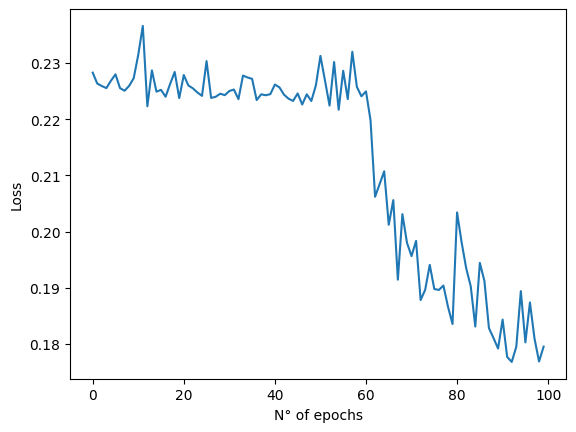

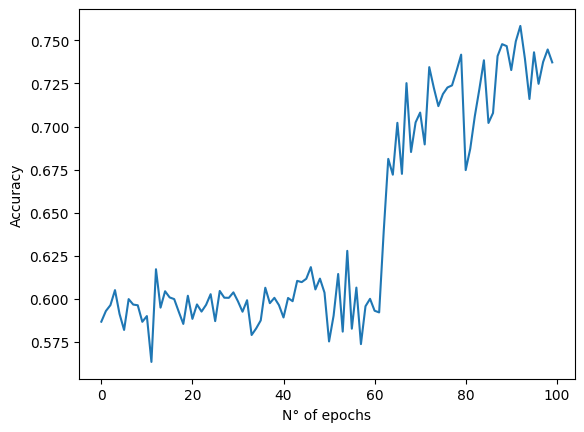

In [12]:
# We import libraries for the model evaluation
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

# We see how our model performs
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# We check our accuracy and loss at the end
print('Loss: {:.2f}%'.format(loss*100))
print('Accuracy: {:.2f}%\n'.format(accuracy*100))

# We display our loss and accuracy graph
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('N° of epochs')
plt.ylabel('Loss')

plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('N° of epochs')
plt.ylabel('Accuracy')

MLP vs SVM

In [18]:
# We import SVC
from sklearn.svm import SVC

# We split training data into train and validation
X_train, X_test, Y_train, Y_test = train_test_split(x_train_dummies, y_train_target, test_size=0.2)

# We create a  model using SVC
SVMmodel=SVC(kernel='linear') # Linear kernel will search for separate lines --> Definition of the kernel parameters
SVMmodel.fit(X_train, Y_train)

# We get the parameters of our model
SVMmodel.get_params()
print('SVM parameters :', SVMmodel.get_params())
SVMmodel.score(X_test, Y_test)
print('SVM score :', SVMmodel.score(X_test, Y_test))

SVM parameters : {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM score : 0.9996744791666666


Kaggle CSV file 


In [19]:
# We predict the model
y_predict = model.predict(x_test)

# We display y_pred
print('y_predict :')
print(y_predict.shape)
print(y_predict)

# We get column index of highest value for each line
y_test = np.argmax(y_predict, axis=1)
y_test = y_test.reshape(3840, 1)

# We add 1 to each line
for i in range(len(y_test)):
  y_test[i] += 1

# We display y_test
print('y_test :')
print(y_test.shape)
print(y_test)

# We create a dataframe
y_test_dataframe = pd.DataFrame(y_test, columns=['target'])

# We save this dataframe into a CSV file 
y_test_dataframe.to_csv('y_test.csv', index_label='id') 

120/120 [==============================] - 0s 1ms/step
y_predict :
(3840, 8)
[[0.0000000e+00 7.8809768e-25 2.5465518e-26 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.5594499e-02 6.4609093e-03 2.6580361e-01 ... 3.2128698e-01
  4.6551814e-03 3.7587860e-01]
 [0.0000000e+00 3.5503495e-26 4.5914757e-28 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [4.4261891e-01 4.7596931e-01 5.4589973e-04 ... 5.7327889e-02
  8.3910034e-19 2.3537958e-02]
 [1.6658194e-02 4.9147303e-03 6.4385885e-01 ... 7.6542102e-02
  8.3417326e-02 1.6730623e-01]
 [4.4694117e-01 4.5128071e-01 8.1643264e-04 ... 7.0617430e-02
  4.6348774e-18 3.0344309e-02]]
y_test :
(3840, 1)
[[5]
 [8]
 [5]
 ...
 [2]
 [3]
 [2]]
